# Deep Neural Networks
Building a Vanilla Network

---

In this notebook, we attempt to conceptualize Deep Neural Networks (DNN) and apply one to a common problem. We'll train a version of a DNN called a Multilayer Perceptron (or vanilla network) to classify images from the MNIST database. The [MNIST](http://yann.lecun.com/exdb/mnist/) database contains 70,000 hand-written digits from 0-9 and is one of the most famous datasets in machine learning. If this all sounds confusing so far, don't worry, we'll start at the beginning.

### Setting the Stage

What is a DNN and why should we care? Imagine a child playing with some marbles on a table. Let's say the marbles are either blue or red and for some reason (OCD?) the blue marbles are mainly on the right side of the table and the red marbles are mainly on the left side. We then ask the child to draw a line on the table separating the two colors. Accordingly, the child draws a line down the middle. Now we add a new marble to the left side of the table and knowing nothing else but the location, we ask the child to predict what color the new marble is. Most red marbles were on the left, so the child predicts red.

At its core, this is all that DNNs are doing. They take in data (red/blue marbles) and learn to draw the best line of separation. When new data is received, the DNN makes predictions based on which side of the line it falls on. We'll get to how DNNs do all of this, but for now just try to understand the goal: draw a line that separates blue from red.

It helps to look at an example. Say we want to predict whether someone who borrowed money from us will repay. We have two pieces of information to go on: their credit score and their annual income. Luckily, we also have a dataset of thousands of other borrowers from the past, which includes their credit scores, annual income, and whether or not they repaid. So we graph the data with their credit scores on the X axis and their annual incomes on the Y axis. We say that borrowers who repaid their debts will be colored red on our graph and those who didn't will be colored blue. Right off the bat, we start to see some grouping in the data. Maybe people with high credit scores and high annual incomes (top right) usually repay and people with low credit score and low annual income (bottom left) don't. This should look like our table full of marbles. We ask our DNN to draw the best line separating the data, and we get a diagonal line dividing the graph in half. Just like the child. We then look at what side of that line our new borrower lands on and make a prediction.

### Neural Network Structure

Sticking with the credit example, let's assume a line and make a prediction. Let's say the best dividing line is as follows (assume variables are normalized to a range between 1-10):

    2 x credit_score + income - 10 = 0 ; if > 0 predict repay
    
Now we are given the credit_score and income of a new borrower [6,5]. If we plug these values into our linear model, we get: 2(6)+5-10=7, and since it is above 0, we predict that the new borrower will repay us. 

In a neural network, this linear equation will be encoded as a graph of layered nodes. Recall that a graph in programming is just a chain of connected nodes. For this example, our graph will have three layers that fully 2 x credit_score + income - 10 = 0 ; if > 0 predict repay.
1. Input layer: A node for each variable we are using to make our prediction. [credit_score, income].
2. Hidden layer: Takes the inputs, multiplies them by weights (the coefficients in our equation above [2,1]), and adds the bias [-10]. This is just a fancy way of solving the equation above. Numpy's matrix product function does this all in one step.
3. Output layer: Takes the result from the hidden layer and runs it through our activation function [if > 0 predict repay].

In code, it looks something like this:

In [1]:
import numpy as np

# Model weights and bias
weights = [2,1]
bias = [-10]

# Input layer
inputs = [6,5]

# Hidden layer
hidden = np.matmul(inputs, weights) + bias[0]

# Output layer
def activation_function(hidden):
    if hidden >= 0:
        return 1
    return 0

output = activation_function(hidden)
print(output)

1


This may seem like an overly complicated way to represent a linear equation, but the magic of the structure is how easy it is for a computer to modify weights (coefficients) and thus learn.

### How the Network Learns

So far, we've seen how a neural network makes a prediction after deciding on the line that seperates our data. Now we need to figure out how it comes up with the line in the first place. Basically, it looks at a bunch of data points that are already labeled and does the following:
1. Start with random weights. (initialization)
2. For each data point, check if it's misclassified. (error function)
3. Modify weights based on how bad the misclassified point is. (optimizer)
4. Repeat steps 2-3 until the model works.

That's pretty much all there is to neural networks. We start with a random model, feed our data forward through it to get a prediction, use an error function to compare the prediction with the real label, and then we backpropagate that error through the weights to get a better model. Of course, there's a lot of math that goes into backpropagating the error into the weights, but we'll ignore that here.

In other words, think of our inputs as buckets of water (nodes). Those buckets are all connected to another bucket (hidden layer) by a hose (weights). That bucket in turn is connected to two gardens (output layer), one representing borrowers who repay and one representing those who don't. The two gardens require different levels of water to flourish. We control the level of water they get my modifying the hose sizes (training) until the whole system is just right.

### The Fine Print

We've glossed over some key terminology that is worth going into a bit deeper.
* Activation function: In our example, we used a simple step function (output > 0, predict 1) but this doesn't really work in practice because its discrete nature makes backpropegation stumble. Luckily, there are other activation functions like Sigmoid, Tanh, ReLU, Softmax, etc that don't have this problem. For a larger list of activations, see https://keras.io/activations/.
* Error function: In our example, we largely ignored this. The error function tells us how well our model is doing in making prediction. We could use number of points misclassified as our error function, but that doesn't really tell us how bad they are misclassified (maybe they are right on our line). In regression a common error function is mean squared error. In classification a common error function is categorical crossentropy. For a larger list of error functions, see https://keras.io/losses/.
* One-hot encoding: In our example, we just said predict [repay, won't repay] but computers aren't good with words. Instead we could encode this into [0,1]. If we had multiple classes, class one could be represented as [1,0,0], two as [0,1,0], and three as [0,0,1].
* Optimizer: In our model, we glossed over this and just said update weights to do better, but a lot of academic work has been put into this. Stochastic gradient descent is probably the most common optimizer. It can be thought of as starting on top of a mountain (high error) and taking small steps down it (lower error). We want to get to the bottom (no error) but sometimes we get stuck in valleys (local minima). To avoid this we randomly restart at other parts of the mountain. We can also modify things like momentum, learning rates, restarts, when to end, etc. For a larger list of optimizers, see https://keras.io/optimizers/.

### Where the Magic Happens

We've seen how a neural network consisting of layers of nodes can encode a line, but what if a line doesn't accurately separate the data? What if we need a circle or some abstract squiggly barrier? This is where neural networks shine. In the same way we feed an input layer into our hidden layer, our hidden layer can be used as input to another layer. Furthermore, each Hidden layer can have multiple nodes, each representing a different linear model. When we combine those linear models, we get a non-linear model. With this structure of more layers and more nodes, our network could learn any dividing pattern it wants. This is where the deep in deep neural network comes from.

Similarly, if we increase the number of inputs from 2 to 3, we go from having a dividing line to a dividing plane. The structure remains the same, but now we are working in higher dimensions.

### Where the Magic Doesn't Happen

It's not all sunshine and rainbows. Neural networks have some serious disadvantages.
* Overfitting: The complexity in our model is a double edged sword. It can find useful patterns for us to exploit, but it can also overfit to our training data and not generalize to new data (like memorizing a textbook word for word instead of understanding the concepts). To avoid overfitting, we can reduce the complexity of our network, apply regularization, use dropout, etc.
* Hyperparameters: There is a lot to tune and tweak with neural networks; the initialized random weights, training time, training batches, learning rates, layers, nodes, optimizers, etc. This makes designing a network more of an art than a science.
* Black box nature: A neural network might solve a problem, but it is not going to tell us how it did. This can cause problems when troubleshooting and reduce our confidence that the model will truly generalize.

### Applicaton: Predicting the MNIST Database

Enough conceptualization, let's build a DNN and train it on some data. Our goal here will be to create a DNN that can take a picture of a handwritten digit (1-9) as input and output what digit it is. This might seem obvious at first, but handwriting can be pretty bad.

We'll be using the Keras library in Python to accomplish this. This library makes it so that we don't have to code all the math in our network at every step. Building a network, adding layers, adding nodes, and parameter tuning can all be done with single lines of code. Installation instructions can be found at https://keras.io/#installation. Let's begin.

### Loading the MNIST Database
Downloading the data is pretty straight forward with Keras since it comes built into the library. We will want two sets of data, training and testing. This will help us avoid overfitting by always checking our network on data it has never seen before.

In [2]:
from keras.datasets import mnist

# Use Keras to import pre-shuffled MNIST database
# Split into training and testing data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

Using TensorFlow backend.


The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


### Visualizing the Training Images

It helps to see what we are working with.

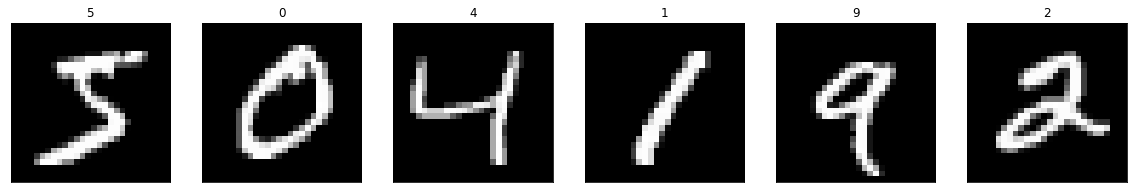

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# Plot the training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

When we look at any of these images our brain effortlessly realizes what they represent. This is pretty crazy when we think about it. No two handwritten digits are exactly alike, and the light cells in our eye that are activating are different, but our brain still figures out what idea they represent.

It's easy to imagine how a computer could mess this up. A 9 could be a 4, that squiggly 2 could be an 8, and so on. Our network is going to need to distinguish patterns in the data that make 3 a 3 and not a 2 nor an 8. At its core, it will be drawing those dividing lines that we've been talking about between features in the images.

### What the Computer Sees

Let's start with what a computer sees when it looks at an image. For the computer, grey-scale images are represented as a matrix with one entry for each image pixel. In the MNIST database, these images are 28x28 pixels so the computer sees a 28x28 matrix. White pixels are encoded as 255 and black pixels are encoded as 0.

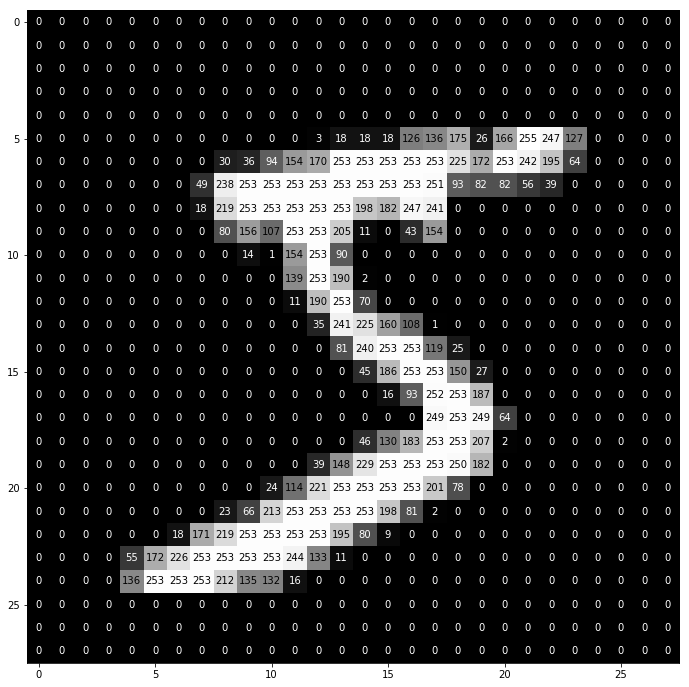

In [4]:
def visualize_input(img, ax):
    """
    Function to show image matrix.
    """
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In the same way we talked about credit scores and incomes as our inputs earlier, these 784 pixels will be the inputs to our new network. Each has a value from 0-255. It's pretty remarkable that our network will be able to make any sense of the data when this is all it sees.

### Preprocess: Rescale the Images by Dividing Every Pixel in Every Image by 255

Before going forward we should preprocess our data a bit. A standard first step in data preprocessing is normalization. This could be simple rescaling, mean subtraction, or zero-mean and unit variance for each variance. Earlier we rescaled all our income and credit scores to a range between 0-10. Here, we will just rescale the data to a range between [0-1]. This will help with optimization.

In [5]:
# rescale [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255 

### Preprocess:  One-Hot Encode Categorical Labels

We also need to preprocess our labels. The current label of say `7` will be converted to a one-hot encoding of `0000000100`, `2` would be `0010000000`, and so on. Luckily, Keras has a utility function that will do this for us.

In [6]:
from keras.utils import np_utils

# Print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# One-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# Print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[5 0 4 1 9 2 1 3 1 4]
One-hot labels:
[[ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]]


Now that the preprocessing is done we are almost ready to build the DNN. The final issue is that our inputs are currently matrices (28x28) but our network requires vectors. This isn't too hard to change. For example a 4x4 matrix can be converted into a vector with 16 entries. Just stack the rows one after the other in a line. For our 28x28 matrix, this means that each input vector will have 784 entries. In keras this can be accomplished with the Flatten function when we build the network.

### Model Architecture

Our model is going to be built in Keras based on the structure we talked about earlier.

1. Input Layer: Flattened 28x28 matrix into 784 nodes each representing a pixel value 0-1.
2. Hidden Layer 1: 512 fully connected nodes (dense in Keras). Why 512? No reason, it could have been 10 nodes or 10,000. The more nodes, the more room for our network to learn complex patterns, but the greater danger of overfitting. Our activation function will be ReLU which returns 0 if the input is negative and return the value of the input if positive.
3. Dropout Layer 1: Dropout layers help prevent overfitting. What they do is randomly discard X% of nodes from the previous layer. This stops any one node from becoming the dominate predictor in our model.
4. Hidden Layer 2: Let's go one layer deeper so our model can discover even more complicated patterns. This will be the same has Hidden Layer 1.
5. Dropout Layer 2: Another dropout to avoid overfitting.
6. Output Layer: 10 nodes for our 10 classes 0-9. Our activation function will be softmax which returns a value between 0-1 for each class. This represents the likelihood of that class.
7. Error Function: We'll use categorical cross-entropy to see how far our predicted likelihood is from the actual classifications.
8. Optimizer: We'll use rmsprop as our optimizer. Rmsprop utilizes the magnitude of recent gradients to normalize the gradients. This is useful when dealing with stochastic objectives.

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# Initalize network
model = Sequential()

# Input layer, flattened
model.add(Flatten(input_shape=X_train.shape[1:]))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(10, activation='softmax'))

# Summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


The total params of 669,706 refers to the weights in our model that will be adjusted to improve our predictions. This can be thought of as sub patterns in the data that can be learnt. For example, one set of connections could be used to find circles in the data. If two circles are present, it might be an 8.

### Compile the Model

Now we put the model architecture together and specify our error function and optimizer.

In [8]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])

### Without training?

Let's see how our model does before any training.

In [9]:
# Evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 9.5500%


Our untrained network does no better than random chance (1/10), which we would expect.

### Training the Model

When training any network, we'll want to use a training set, a validation set, and a test set.
* Training set: The network looks only at this data when deciding how to modify its weights.
* Validation set: At every epoch, the model will check how it's doing on the validation set. This is used for parameter turning and avoiding overfitting.
* Test set: The network looks at data it has truely never seen before. Helps ensure we didn't overfit our parameters to the validation set.

In other words, we use the training set to find patterns and the validation set to adjust parameters. The test set is the final sanity check.

We'll also use ModelCheckpoint in order to callback our model at different points in training. https://machinelearningmastery.com/check-point-deep-learning-models-keras/. For example, if at 100 epochs our training accuracy starts to get better but our validation accuracy starts to get worse, we'll want to use our weights from the 100th epoch. An epoch is just one full training pass on all the data. We can also try many different model architictures and save the validation result from each for comparison. Here we will save the best validation results to 'mnist.model.best.hdf5'.

In [10]:
from keras.callbacks import ModelCheckpoint   

# Train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
graph = model.fit(X_train, y_train, batch_size=128, epochs=20,
                  validation_split=0.2, callbacks=[checkpointer],
                  verbose=0, shuffle=True)

Epoch 00000: val_loss improved from inf to 0.14875, saving model to mnist.model.best.hdf5
Epoch 00001: val_loss improved from 0.14875 to 0.09778, saving model to mnist.model.best.hdf5
Epoch 00002: val_loss did not improve
Epoch 00003: val_loss improved from 0.09778 to 0.07675, saving model to mnist.model.best.hdf5
Epoch 00004: val_loss did not improve
Epoch 00005: val_loss did not improve
Epoch 00006: val_loss did not improve
Epoch 00007: val_loss did not improve
Epoch 00008: val_loss did not improve
Epoch 00009: val_loss did not improve
Epoch 00010: val_loss did not improve
Epoch 00011: val_loss did not improve
Epoch 00012: val_loss did not improve
Epoch 00013: val_loss did not improve
Epoch 00014: val_loss did not improve
Epoch 00015: val_loss did not improve
Epoch 00016: val_loss did not improve
Epoch 00017: val_loss did not improve
Epoch 00018: val_loss did not improve
Epoch 00019: val_loss did not improve


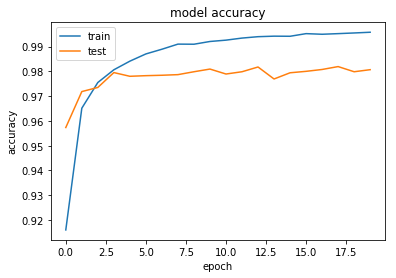

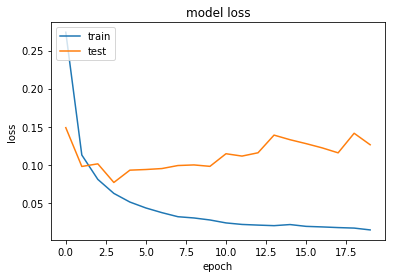

In [11]:
# Visualize training
# Summarize the history of accuracy
plt.plot(graph.history['acc'])
plt.plot(graph.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Summarize the history of loss
plt.plot(graph.history['loss'])
plt.plot(graph.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Notice our model stopped saving results at the 3rd epoch. After that point the model began to overfit. This can be seen in the model loss graph where the training loss keeps getting lower but the validation test loss rises.

### Load Best Weights

Loading our best weights is simple.

In [14]:
# Load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

### Accuracy on the Test Set

Time to test our network.

In [15]:
# Evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# Print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.0700%


98% accuracy is pretty good. The reason our multilayer perceptron works so well is that the MNIST data is very clean and preprocessed. Images tend to be centered and the same size. What if the actual written number appeared in the corner and was far smaller than other numbers? For problems with messy data, convolutional neural networks (CNNs) do a lot better than MLPs.

The reason is that MLPs flatten the data and have no knowledge of the spatial location of pixels. CNN's, by contrast, shine with multidimensional information. CNN's are able to understand that pixels closer to each other are more related. Next time we'll make a CNN.